In [5]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn
matplotlib.style.use('seaborn')
import torch as T
from agent_code.dqn_agent.dqn_model import DQN, Buffer

%matplotlib inline

In [6]:
def latest(d):
    def steps(name):
        return int(name.split('step-')[-1].split('_aint')[0])
    def date(name):
        return datetime.datetime.fromisoformat(name.split('_')[0][6:])
    for f in os.listdir(d):
        if os.path.isfile(d+f):
            print(f)
            print(date(f))
            print(steps(f))
    flist = np.array([[f, date(f), steps(f)] for f in os.listdir(d) if os.path.isfile(d+f)])
    print(flist)
    print(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])
    return flist[np.argmax(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])][0]

In [13]:
last = True
directory = '/home/phaetjay/models/cuda/'
modelname = 'model-2019-03-25-15:03:12'
step = 1050330

name = ''        
#name = latest(directory) if last else name
name = modelname + '/' + modelname + '_step-' + str(step) + '_aint-5000_lint-8' + '.pth'

In [14]:
print('Model name:', name)
aint = int(name.split('_aint-')[1].split('_lint')[0])
lint = int(name.split('_lint-')[1].split('.pth')[0])
data = T.load(directory + name, map_location='cpu')['analysis']
info = T.load(directory + name, map_location='cpu')['info']
print(f'Analysis interval: {aint}, learning interval: {lint}')
data = np.array(data)
steps = np.array([step['learningstep'] for step in data]) * lint
maxstep = np.max(steps)
print(f'There are {len(data)} data points from {maxstep} training steps.')
print(f'This corresponds to {maxstep} training steps.')
#print('\nExcerpt of the data:\n',data[1])
#print(data[1]['example']['q'].shape)
print('-------------------------------------------------------------------------------------------------')
print('### Model Information ###')
for thing in info:
    print(thing + ':', info[thing])

Model name: model-2019-03-25-15:03:12/model-2019-03-25-15:03:12_step-1050330_aint-5000_lint-8.pth
Analysis interval: 5000, learning interval: 8
There are 210 data points from 1049608 training steps.
This corresponds to 1049608 training steps.
-------------------------------------------------------------------------------------------------
### Model Information ###
explaysize: 1000000


In [15]:
action = [step['action'] for step in data]
reward = [step['reward'] for step in data]
finalscore = [step['score'] for step in data]
epsilon = np.array([step['epsilon'] for step in data]).T
exploration = np.array([step['exploration'] for step in data]).T / aint * 100
loss = [step['loss'] for step in data]
q = [step['q'] for step in data]
weights = [step['weights'] for step in data]

### Plot of average action taken in each step

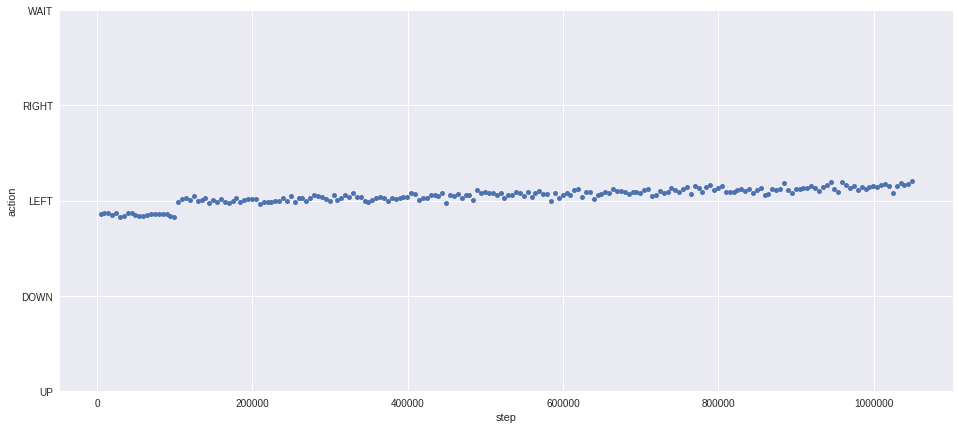

In [16]:
plt.figure(figsize=(16, 7))
plt.yticks((0, 1, 2, 3, 4), ('UP', 'DOWN', 'LEFT', 'RIGHT', 'WAIT'))
plt.ylim(0, 4)
plt.xlabel('step')
plt.ylabel('action')
plt.plot(steps, action, 'o', ms=5, color='C6')
plt.savefig(directory + name + '_action.png', dpi=300)

### Plot of ε-greediness (exploration vs exploitation)

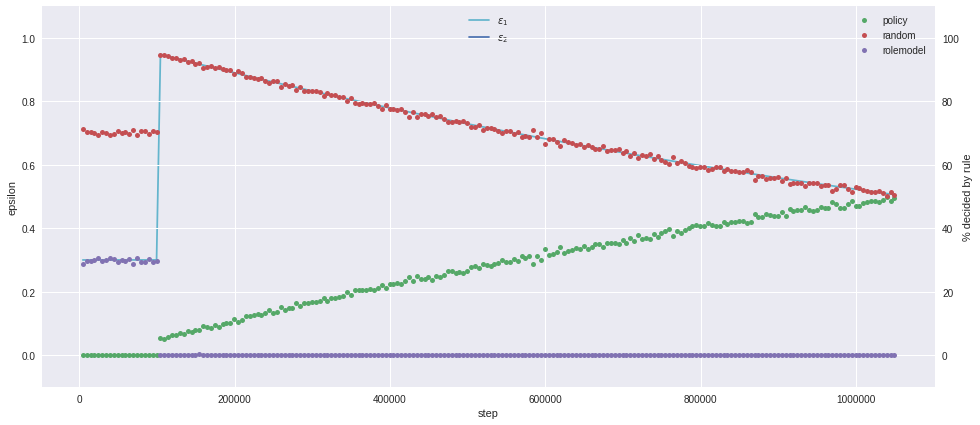

In [17]:
plt.figure(figsize=(16, 7))
plt.xlabel('step')
plt.ylim(-0.1, 1.1)
plt.ylabel('epsilon')
plt.plot(steps, epsilon[0], '-', ms=3, color='C5', label=r'$\epsilon_1$')
plt.plot(steps, epsilon[1], '-', ms=3, color='C6', label=r'$\epsilon_2$')
plt.legend(loc='upper center')
plt.twinx()
plt.ylabel(r'% decided by rule')
plt.ylim(-10, 110)
plt.plot(steps, exploration[0], 'o', ms='5', color='C7', label='policy')
plt.plot(steps, exploration[1], 'o', ms='5', color='C8', label='random')
plt.plot(steps, exploration[2], 'o', ms='5', color='C9', label='rolemodel')
plt.legend(loc='upper right')
plt.savefig(directory + name + '_epsilon.png', dpi=300)

### Plot of reward in each step

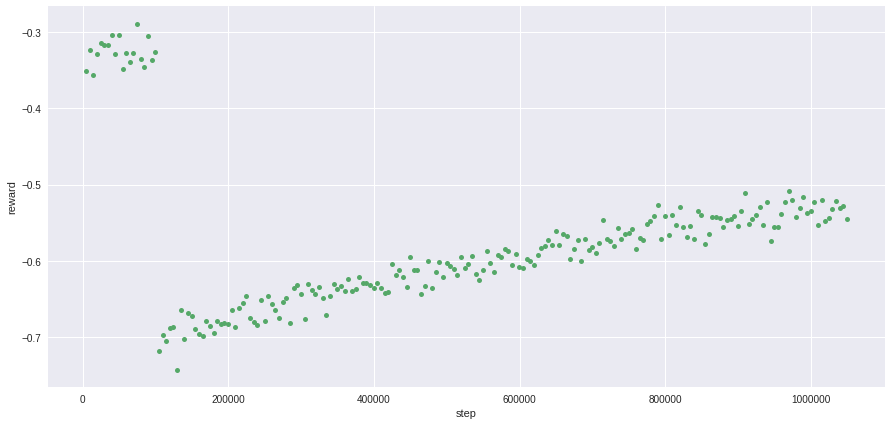

In [18]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('reward')
plt.plot(steps, reward, 'o', ms=5, color='C1')
plt.savefig(directory + name + '_reward.png', dpi=300)

### Plot of Q over training period

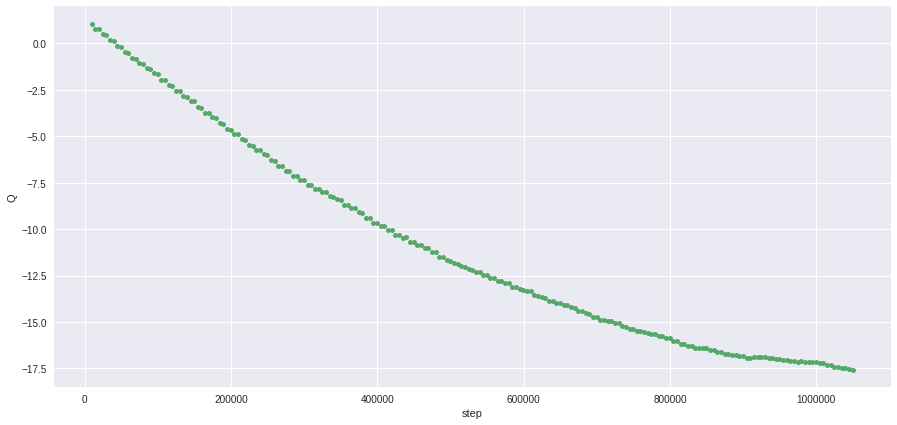

In [19]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('Q')
plt.plot(steps[1:], q[1:], 'o', ms=5, color='C1')
plt.savefig(directory + name + '_q.png', dpi=300)

### Plot of loss over training period

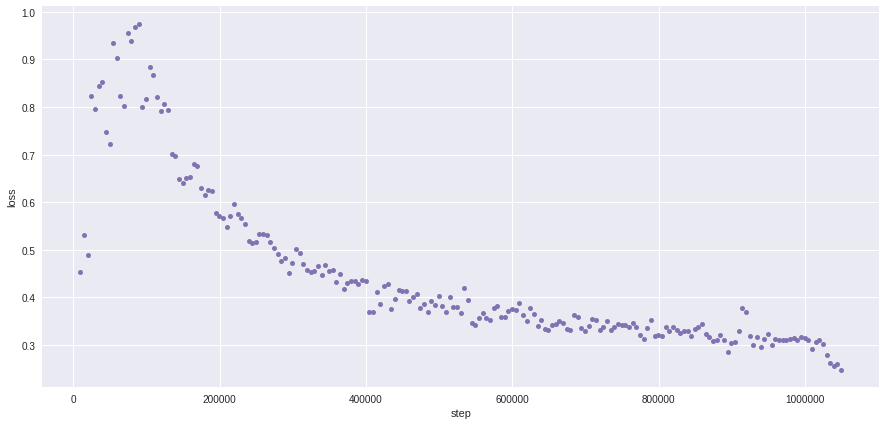

In [20]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('loss')
plt.plot(steps[1:], loss[1:], 'o', ms=5, color='C3')
plt.savefig(directory + name + '_loss.png', dpi=300)

### Plot of $L^2$-norm of model weights over training period

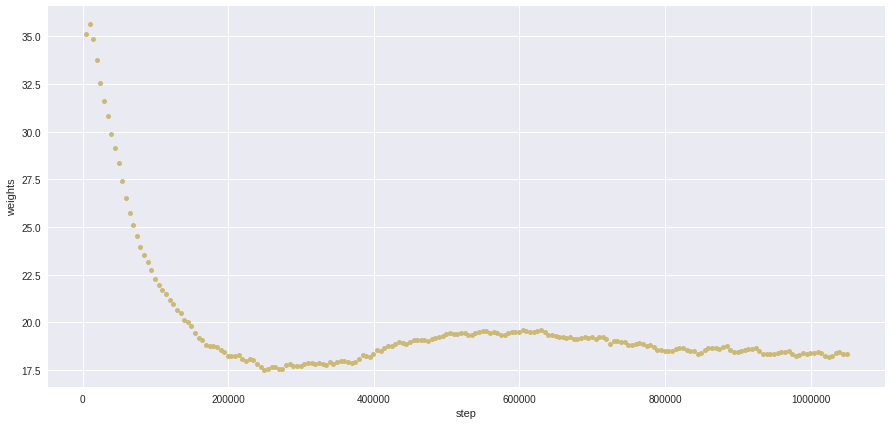

In [21]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('weights')
plt.plot(steps, weights, 'o', ms=5, color='C4')
plt.savefig(directory + name + '_weights.png', dpi=300)